**Caltrans PRD Excel Extract**

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [3]:
CA_PRD = pd.DataFrame()

for year in range(2001, 2023):
    tab = 'Table 1' if year >= 2017 else f'{year} PRD_Table 1'
    temp = pd.read_excel(pd.ExcelFile(f'HPMS2001_2022_PRD/{year}_PRD.xlsx'), tab)
    
    temp = temp[temp.iloc[:, 0]=='STATE HIGHWAYS']
    
    temp = temp.dropna(axis=1, how='all')
    temp.columns = ['Jurisdiction', 'Total Maintained Miles', 'Lane Miles', 'Annual VMT (Millions)']
    
    CA_PRD = pd.concat([CA_PRD, temp])

# Reset the index of the final DataFrame
CA_PRD.reset_index(drop=True, inplace=True)
CA_PRD.head()


,Jurisdiction,Total Maintained Miles,Lane Miles,Annual VMT (Millions)
0,STATE HIGHWAYS,15227.820995,49925.26798,167684.867433
1,STATE HIGHWAYS,15233.675998,50343.31299,172549.353502
2,STATE HIGHWAYS,15224.619998,50341.505991,178436.015065
3,STATE HIGHWAYS,15208.789999,50524.520992,182906.273988
4,STATE HIGHWAYS,15212.896201,50560.176197,183460.488631


In [47]:
def hwymiles(county):
    TAB5_PRD = pd.DataFrame()
    for year in range(2001, 2023):
        tab = 'Table 5' if year >= 2017 else f'{year} PRD_Table 5'
        temp = pd.read_excel(pd.ExcelFile(f'HPMS2001_2022_PRD/{year}_PRD.xlsx'), tab)
        
        temp = temp.dropna(axis=1, how='all')
        temp = temp[temp.iloc[:, 0]==f'{county}']
        
        temp.columns = ['County', 'City Road', 'County Roads', 'State Highway', 'NA1', 'NA2', 'NA3', 'NA4', 'Total']
        
        TAB5_PRD = pd.concat([TAB5_PRD, temp])

    # Reset the index of the final DataFrame
    TAB5_PRD.reset_index(drop=True, inplace=True)
    TAB5_PRD['Year'] = np.arange(2001, 2023)
    
    plt.plot(TAB5_PRD['Year'], TAB5_PRD['State Highway'])
    plt.title(f'{county} County State-Highway Miles')
    plt.grid()


Worksheet named '2008 PRD_Table 6' not found for the year 2008.
Worksheet named '2009 PRD_Table 6' not found for the year 2009.


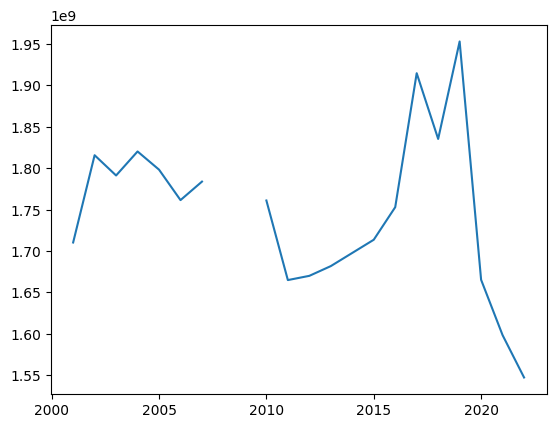

In [46]:
def VMT(county, value_2008, value_2009):
    TAB6_PRD = pd.DataFrame()

    # Iterate over the years
    for year in range(2001, 2023):
        try:
            # Load the data
            tab = 'Table 6' if year >= 2017 else f'{year} PRD_Table 6'
            
            try:
                temp = pd.read_excel(pd.ExcelFile(f'HPMS2001_2022_PRD/{year}_PRD.xlsx'), tab)
            except ValueError:
                print(f"Worksheet named '{tab}' not found for the year {year}.")
                temp = pd.DataFrame([[np.nan]*8], columns=['County', 'NA', 'Rural Miles', 'Urban Miles', 'Total Miles', 'Rural DVMT', 'Urban DVMT', 'Total DVMT'])
                temp['Year'] = year
                TAB6_PRD = pd.concat([TAB6_PRD, temp])
                continue
            
            temp = temp.dropna(axis=1, how='all')
            temp = temp[temp.iloc[:, 0].str.contains(f'^{re.escape(county)}\s+TOTAL$', case=False, na=False)]
            
            temp.columns = ['County', 'NA', 'Rural Miles', 'Urban Miles', 'Total Miles', 'Rural DVMT', 'Urban DVMT', 'Total DVMT']
            
            # Add a column for the year
            temp['Year'] = year
            
        except FileNotFoundError:
            print(f"Data file for the year {year} is missing.")
            # Create a row of NaNs for the missing year
            temp = pd.DataFrame([[np.nan]*8], columns=['County', 'NA', 'Rural Miles', 'Urban Miles', 'Total Miles', 'Rural DVMT', 'Urban DVMT', 'Total DVMT'])
            temp['Year'] = year
            TAB6_PRD = pd.concat([TAB6_PRD, temp])
            continue
        except Exception as e:
            # print(f"An error occurred for the year {year}: {e}")
            continue

        TAB6_PRD = pd.concat([TAB6_PRD, temp])
        # print(f'{year} processed')

    # Reset the index of the final DataFrame
    TAB6_PRD.reset_index(drop=True, inplace=True)

    TAB6_PRD.loc[(TAB6_PRD['Year'] == 2008), 'Total DVMT'] = value_2008
    TAB6_PRD.loc[(TAB6_PRD['Year'] == 2009), 'Total DVMT'] = value_2009

    return TAB6_PRD

# Call the function
TAB6_PRD = VMT('BUTTE', np.nan, np.nan)
plt.plot(TAB6_PRD['Year'], TAB6_PRD['Total DVMT']*1000*365)
